XGBoost提供了gradient boosting的一个高效实现，可以训练random forest ensembles.

Random forest比gradient boosting简单. The XGBoost library allows the models to be trained in a way that repurposes and harnesses the computational efficiencies implemented in the library for training random forest models.

本文使用XGBoost训练random forest ensembles.

After completing this tutorial, you will know:

- XGBoost provides an efficient implementation of gradient boosting that can be configured to train random forest ensembles.
- 如何使用XGBoost训练和评估random forest ensemble模型解决分类和回归问题.
- 如何调优XGBoost random forest ensemble模型超参.

# 1. Random Forest With XGBoost

XGBoost is an open-source library that provides an efficient implementation of the gradient boosting ensemble algorithm, referred to as Extreme Gradient Boosting or XGBoost for short.

As such, XGBoost refers to the project, the library, and the algorithm itself.

Gradient boosting是分类和回归预测模型的首选算法，因为其性能是最好的. 通常，gradient boosting训练模型很慢, and the problem is exasperated by large datasets.

XGBoost addresses the speed problems of gradient boosting by introducing a number of techniques that dramatically accelerate the training of the model and often result in better overall performance of the model.

更多关于XGBoost参考: [A Gentle Introduction to XGBoost for Applied Machine Learning](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/)

除了支持gradient boosting, XGBoost也支持其他tree ensemble算法, 如random forest.

Random forest is an ensemble of decision trees algorithms.

Each decision tree is fit on a [bootstrap sample](https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/) of the training dataset. This is a sample of the training dataset where a given example (rows) may be selected more than once, referred to as sampling with replacement.

Importantly, a random subset of the input variables (columns) at each split point in the tree is considered. This ensures that each tree added to the ensemble is skillful, but different in random ways. The number of features considered at each split point is often a small subset. For example, on classification problems, a common heuristic is to select the number of features equal to the square root of the total number of features, e.g. 4 if a dataset had 20 input variables.
    
更多关于random forest ensemble参考: [How to Develop a Random Forest Ensemble in Python](https://machinelearningmastery.com/random-forest-ensemble-in-python/)

用XGBoost训练random forest的主要好处是速度快. It is expected to be significantly faster to use than other implementations, such as the native scikit-learn implementation.

Now that we know that XGBoost offers support for the random forest ensemble, let’s look at the specific API.

# 2. XGBoost API for Random Forest

The XGBoost library provides two wrapper classes that allow the random forest implementation provided by the library to be used with the scikit-learn machine learning library.

`XGBRFClassifier`和`XGBRFRegressor`类分别针对分类和回归问题.

```
...
# define the model
model = XGBRFClassifier()
```

The number of trees used in the ensemble can be set via the “n_estimators” argument, and typically, this is increased until no further improvement in performance is observed by the model. Often hundreds or thousands of trees are used.

```
...
# define the model
model = XGBRFClassifier(n_estimators=100)
```
XGBoost does not have support for drawing a bootstrap sample for each decision tree. This is a limitation of the library.

Instead, a subsample of the training dataset, without replacement, can be specified via the “subsample” argument as a percentage between 0.0 and 1.0 (100 percent of rows in the training dataset). Values of 0.8 or 0.9 are recommended to ensure that the dataset is large enough to train a skillful model but different enough to introduce some diversity into the ensemble.

```
...
# define the model
model = XGBRFClassifier(n_estimators=100, subsample=0.9)
```

The number of features used at each split point when training a model can be specified via the “colsample_bynode” argument and takes a percentage of the number of columns in the dataset from 0.0 to 1.0 (100 percent of input rows in the training dataset).

If we had 20 input variables in our training dataset and the heuristic for classification problems is the square root of the number of features, then this could be set to sqrt(20) / 20, or about 4 / 20 or 0.2.

```
...
# define the model
model = XGBRFClassifier(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
```

更多配置XGBoost random forest ensembles参考: [Random Forests in XGBoost](https://xgboost.readthedocs.io/en/latest/tutorials/rf.html)

Now that we are familiar with how to use the XGBoost API to define random forest ensembles, let’s look at some worked examples.

# 3. XGBoost Random Forest for Classification

In this section, we will look at developing an XGBoost random forest ensemble for a classification problem.

首先, we can use the [make_classification() function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) to create a synthetic binary classification problem with 1,000 examples and 20 input features.

The complete example is listed below.

```
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# summarize the dataset
print(X.shape, y.shape)
```

Running the example creates the dataset and summarizes the shape of the input and output components.

接下来, 可以在该数据集上用XGBoost random forest算法.

We will evaluate the model using repeated [stratified k-fold cross-validation](https://machinelearningmastery.com/cross-validation-for-imbalanced-classification/), with three repeats and 10 folds. We will report the mean and standard deviation of the accuracy of the model across all repeats and folds.

In [21]:
# evaluate xgboost random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBRFClassifier

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# summarize the dataset
print(X.shape, y.shape)
# define the model
model = XGBRFClassifier(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

(1000, 20) (1000,)
Mean Accuracy: 0.832 (0.036)


Running the example reports the mean and standard deviation accuracy of the model.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see the XGBoost random forest ensemble achieved a classification accuracy of about 89.1 percent.

We can also use the XGBoost random forest model as a final model and make predictions for classification.

First, the XGBoost random forest ensemble is fit on all available data, then the predict() function can be called to make predictions on new data.

The example below demonstrates this on our binary classification dataset.

In [5]:
# make predictions using xgboost random forest for classification
from numpy import asarray
from sklearn.datasets import make_classification
from xgboost import XGBRFClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = XGBRFClassifier(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
# fit the model on the whole dataset
model.fit(X, y)
# define a row of data
row = [0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]
row = asarray([row])
# make a prediction
yhat = model.predict(row)
# summarize the prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


运行上面示例在整个数据集上拟合XGBoost random forest ensemble 模型，再用一个新数据做预测, 之后，我们就可以在应用中使用该模型.

Now that we are familiar with using random forest for classification, let’s look at the API for regression.

# 4. XGBoost Random Forest for Regression

In this section, we will look at developing an XGBoost random forest ensemble for a regression problem.

首先, 使用[make_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) 函数伪造回归问题的数据集，1000条，20个特征.

完整示例如下.

In [22]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


Running the example creates the dataset and summarizes the shape of the input and output components.

接下来, 我们在该数据集上使用XGBoost random forest ensemble.

As we did with the last section, we will evaluate the model using repeated k-fold cross-validation, with three repeats and 10 folds.

We will report the mean absolute error (MAE) of the model across all repeats and folds. The scikit-learn library makes the MAE negative so that it is maximized instead of minimized. This means that larger negative MAE are better and a perfect model has a MAE of 0.

The complete example is listed below.

In [26]:
# evaluate xgboost random forest ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRFRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = XGBRFRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
# define the model evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

RepeatedKFold(n_repeats=3, n_splits=10, random_state=1)
MAE: -137.932 (7.413)


Running the example reports the mean and standard deviation MAE of the model.

Note: Your [results may vary](https://machinelearningmastery.com/different-results-each-time-in-machine-learning/) given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see the random forest ensemble with default hyperparameters achieves a MAE of about 108.

We can also use the XGBoost random forest ensemble as a final model and make predictions for regression.

首先, random forest ensemble拟合所有可用的数据, 再调用`predict()`函数在新数据上预测.

The example below demonstrates this on our regression dataset.

In [24]:
# gradient xgboost random forest for making predictions for regression
from numpy import asarray
from sklearn.datasets import make_regression
from xgboost import XGBRFRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = XGBRFRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
# fit the model on the whole dataset
model.fit(X, y)

# define a single row of data
row = [0.20543991,-0.97049844,-0.81403429,-0.23842689,-0.60704084,-0.48541492,0.53113006,2.01834338,-0.90745243,-1.85859731,-1.02334791,-0.6877744,0.60984819,-0.70630121,-1.29161497,1.32385441,1.42150747,1.26567231,2.56569098,-0.11154792]
row = asarray([row])
# make a prediction
yhat = model.predict(row)

# summarize the prediction
print('Prediction: %d' % yhat[0])

[22:50:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Prediction: 21


运行上面示例在整个数据集上拟合XGBoost random forest ensemble 模型，再用一个新数据做预测, 之后，我们就可以在应用中使用该模型.

Now that we are familiar with how to develop and evaluate XGBoost random forest ensembles, let’s look at configuring the model.

# 5. XGBoost Random Forest 超参

In this section, we will take a closer look at some of the hyperparameters you should consider tuning for the random forest ensemble and their effect on model performance.

## 探索树的个数
树的个数是配置XGBoost random forest的另一个关键的超参.

通常, 增加树的个数直到模型性能稳定. Intuition might suggest that more trees will lead to overfitting, although this is not the case. Both bagging and random forest algorithms appear to be somewhat immune to overfitting the training dataset given the stochastic nature of the learning algorithm.

树的个数可以通过设置 “n_estimators” 参数，默认为 100.

The example below explores the effect of the number of trees with values between 10 to 1,000.

>10 0.824 (0.037)
>50 0.834 (0.036)
>100 0.832 (0.036)
>500 0.835 (0.035)
>1000 0.835 (0.036)
>5000 0.833 (0.033)


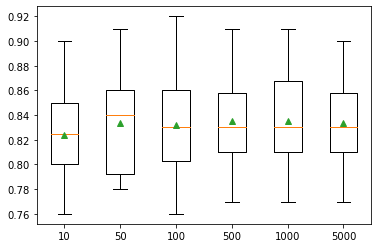

In [27]:
# explore xgboost random forest number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBRFClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# define the number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for v in n_trees:
		models[str(v)] = XGBRFClassifier(n_estimators=v, subsample=0.9, colsample_bynode=0.2)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the model evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the results
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Running the example first reports the mean accuracy for each configured number of trees.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see that performance rises and stays flat after about 500 trees. Mean accuracy scores fluctuate across 500, 1,000, and 5,000 trees and this may be statistical noise.

A box and whisker plot is created for the distribution of accuracy scores for each configured number of trees.

## 探索特征的个数
The number of features that are randomly sampled for each split point is perhaps the most important feature to configure for random forest.

It is set via the “colsample_bynode” argument, which takes a percentage of the number of input features from 0 to 1.

The example below explores the effect of the number of features randomly selected at each split point on model accuracy. We will try values from 0.0 to 1.0 with an increment of 0.1, although we would expect values below 0.2 or 0.3 to result in good or best performance given that this translates to about the square root of the number of input features, which is a common heuristic.

>0.1 0.839 (0.035)
>0.2 0.832 (0.036)
>0.3 0.836 (0.033)
>0.4 0.831 (0.039)
>0.5 0.827 (0.037)
>0.6 0.819 (0.037)
>0.7 0.812 (0.038)
>0.8 0.807 (0.037)
>0.9 0.796 (0.038)
>1.0 0.792 (0.038)


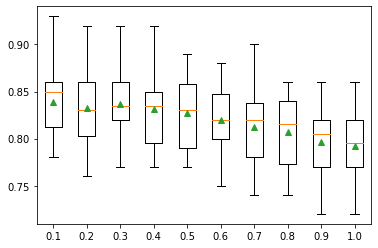

In [28]:
# explore xgboost random forest number of features effect on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBRFClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	for v in arange(0.1, 1.1, 0.1):
		key = '%.1f' % v
		models[key] = XGBRFClassifier(n_estimators=100, subsample=0.9, colsample_bynode=v)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the model evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the results
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

A box and whisker plot is created for the distribution of accuracy scores for each feature set size.

We can see a trend in performance decreasing with the number of features considered by the decision trees.

# Further Reading

This section provides more resources on the topic if you are looking to go deeper.

## Tutorials
- [A Gentle Introduction to XGBoost for Applied Machine Learning](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/)
- [How to Develop a Random Forest Ensemble in Python](https://machinelearningmastery.com/random-forest-ensemble-in-python/)
- [Gradient Boosting with Scikit-Learn, XGBoost, LightGBM, and CatBoost](https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/)
- [How to Develop Your First XGBoost Model in Python with scikit-learn](https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/)

## APIs
- [Random Forests in XGBoost](https://xgboost.readthedocs.io/en/latest/tutorials/rf.html)
- [xgboost.XGBRFClassifier API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRFClassifier)
- [xgboost.XGBRFRegressor API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRFRegressor)

## Summary
In this tutorial, you discovered how to use the XGBoost library to develop random forest ensembles.

Specifically, you learned:

- XGBoost provides an efficient implementation of gradient boosting that can be configured to train random forest ensembles.
- How to use the XGBoost API to train and evaluate random forest ensemble models for classification and regression.
- How to tune the hyperparameters of the XGBoost random forest ensemble model.